# Problem 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import astropy.units as u
import astropy.constants as c
import mesa_web

## a)

This problem involves creating an H-R diagram showcasing the pre-main-sequence (PMS) and main sequence (MS) evolution of a star. In this case, I analyze a sun-like star (1 M$_{\odot}$ and solar metallicity). Let's start with the H-R diagram.

In [2]:
# read in the datafile
history_fname = 'mesa/MESA-Web_Job_09112317926/trimmed_history.data'
data_dict = mesa_web.read_history(history_fname)

In [3]:
# extract the age (time coordinate), luminosity, and temperature
age = np.log10(data_dict['star_age'])
L = data_dict['log_L']
T = data_dict['log_Teff']

# slice above arrays during the pre-main-sequence phase
pms_start = 50
pms_end = 255
age_pms = age[pms_start:pms_end]
T_pms = T[pms_start:pms_end]
L_pms = L[pms_start:pms_end]

# slice above arrays during the main sequence phase
ms_start = pms_end
ms_end = 330
age_ms = age[ms_start:ms_end]
T_ms = T[ms_start:ms_end]
L_ms = L[ms_start:ms_end]

# index at which the luminosity starts increasing during PMS phase
lum_turnover = 204

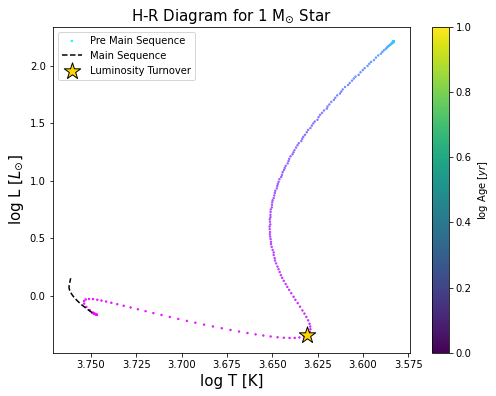

In [4]:
# H-R diagram for the 1 solar mass star during PMS and MS
plt.figure(figsize=(8, 6))
plt.scatter(T_pms, L_pms, s=2, c=age_pms, cmap='cool', label='Pre Main Sequence')
plt.plot(T_ms, L_ms, c='k', ls='--', label='Main Sequence')
plt.scatter(T[lum_turnover], L[lum_turnover], s=300, c='gold', edgecolors='black', \
            marker='*', label='Luminosity Turnover')

plt.title(r'H-R Diagram for 1 M$_{\odot}$ Star', fontsize=15)
plt.gca().invert_xaxis()
plt.xlabel(r'log T [K]', fontsize=15)
plt.ylabel(r'log L $[L_{\odot}]$', fontsize=15)
plt.colorbar(label=r'log Age $[yr]$')
plt.legend();

## b)

Now I look at 2 physical changes or phase transitions the star undergoes in the PMS phase. The first physical change I'm going to investigate is the steady increase in p-p chain and CNO cycle luminosity as the star approaches the main sequence. The contraction of the star causes the core temperature to increase, and eventually these fusion processes generate a larger and larger share of the total luminosity of the star. The textbook states that around the point where the luminosity increases in the PMS phase (the point marked "Luminosity Turnover" on my plot above), the nuclear reactions begin to take a larger and larger share of the energy production over gravitational collapse.

In [5]:
pp = data_dict['pp'] # p-p chain luminosity
cno = data_dict['cno'] # cno cycle luminosity
T_cent = data_dict['log_center_T'] # central temperature

# above arrays sliced during PMS phase
pp_pms = pp[pms_start:pms_end]
cno_pms = cno[pms_start:pms_end]
T_cent_pms = T_cent[pms_start:pms_end]

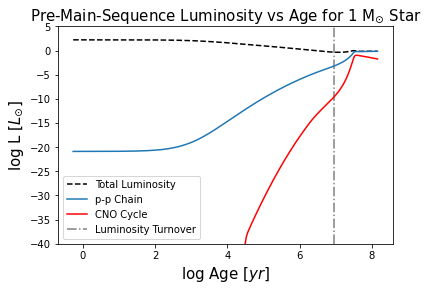

In [6]:
# plot of luminosities (total and by source) vs age
plt.plot(age_pms, L_pms, ls='--', c='k', label='Total Luminosity')
plt.plot(age_pms, pp_pms, label='p-p Chain')
plt.plot(age_pms, cno_pms, c='r', label='CNO Cycle')
plt.axvline(age[lum_turnover], c='grey', ls='dashdot', zorder=-1, label='Luminosity Turnover')


plt.title('Pre-Main-Sequence Luminosity vs Age for 1 M$_{\odot}$ Star', fontsize=15)
plt.xlabel(r'log Age $[yr]$', fontsize=15)
plt.ylabel(r'log L $[L_{\odot}]$', fontsize=15)
plt.ylim(-40, 5)
plt.legend();

As we can see from the above plot, the luminosity generated by the fusion processes does indeed appear to mostly get to appreciable levels just after the time of the "luminosity turnover", which agrees with the story told in our textbook. As a point of comparison, let's also look at a plot of central temperature vs age.

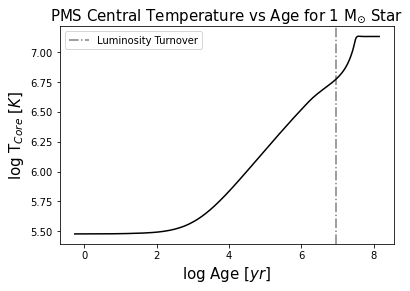

In [7]:
# core temperature vs age plot
plt.plot(age_pms, T_cent_pms, c='k')
plt.axvline(age[lum_turnover], c='grey', ls='dashdot', zorder=-1, label='Luminosity Turnover')

plt.title('PMS Central Temperature vs Age for 1 M$_{\odot}$ Star', fontsize=15)
plt.xlabel(r'log Age $[yr]$', fontsize=15)
plt.ylabel(r'log T$_{Core}$ $[K]$', fontsize=15)
plt.legend();

The central temperature plot gives a natural way to explain the evolution in the nuclear reaction luminosities we observe above. The contraction of the star continues to increase the core temperature over time. The strongly temperature dependent fusion reactions, especially the CNO cycle, jump up "quickly" as a result, and begin to dominate the total energy production of the star. Again, the temperature reaches a kind of critical value just after the "luminosity turnover".

The next physical change I want to look at is right at the end of the PMS phase. The textbook mentions that as the star exhausts its supply of $^{12}C$, it settles into its long-term nuclear burning phase on the main sequence as the major branches of the p-p chain are activated at the higher core temperatures and take over. Let's show this drop in $^{12}C$ content.

In [8]:
M_C_core = data_dict['center_c12'] # 12C core mass fraction
M_C_core_pms = M_C_core[pms_start:pms_end] # 12C mass frac. during PMS

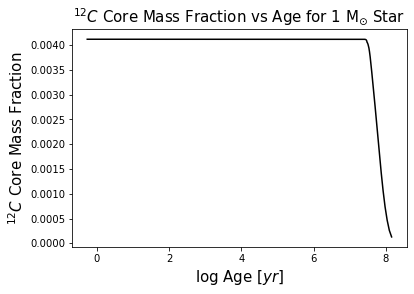

In [9]:
# core mass fraction vs age plot
plt.plot(age_pms, M_C_core_pms, c='k')
plt.title('$^{12}C$ Core Mass Fraction vs Age for 1 M$_{\odot}$ Star', fontsize=15)
plt.xlabel(r'log Age $[yr]$', fontsize=15)
plt.ylabel(r'$^{12}C$ Core Mass Fraction', fontsize=15);

We indeed see the result we expect. The $^{12}C$ mass fraction drops quickly at the end of the PMS phase, ushering the star onto the main sequence.